# Making plots: baseline and final model f1 scores
To compare the created model with results of the original method where trained experts determine the locations of the protein in a cell in this notebooks plots can be made of the f1-scores of the models in the `models` directory and the baseline model.

In [1]:
#Import everything needed.
from sklearn.metrics import fbeta_score
import joblib, glob
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt

#own written classes
from plot_classes import OrderLabels, MulticlassPlots

import warnings
warnings.filterwarnings("ignore")


### Getting the models
All models of the other notebooks can be saved in the `models` directory. For all of these the plots will be created. 

In [2]:
#path to needed directories
model_dir = '../models/*' #saved models
label_file = '../data/train.csv' #file with the labels for each picture 

#getting name, locations and model_data
df_models = pd.DataFrame(index=range(28))
for f in glob.glob(model_dir):
    model, loc_number = f.rsplit('_',1)
    model = model[10:]
    if not model in df_models.columns:
        list_model = np.zeros(28)
        df_models[model] = list_model
    df_models.loc[df_models.index[int(loc_number)],model]=f
#Number and names of models is needed for plotting 
model_num = len(df_models.columns) 
model_name = df_models.columns


In [3]:
df_models = df_models.reset_index()
df_models = df_models.rename(columns = {'index':'key'})


### Sort the data 
We expect that the f1-scores for the more frequent locations are higher than the f1_scores for the less frequent locations. To make it easier to compare the results, we sort the labels of the locations. 

In [4]:
# get the labels for the images
train_labels = pd.read_csv(label_file)
# get the right column name
train_labels.rename(columns = {'Guess':'Target'}, inplace = True)
# fixing any whitespace
train_labels = train_labels.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#Create object of the sorting class and call method to sort
order_doer = OrderLabels(target_labels=train_labels)
order_doer.ordered_dataframe()

In [5]:
#show the ordered dataframe
order_doer.df_order

,occurence_order,key,Loc,count
0,0,0,Nucleoplasm,12885
1,1,25,Cytosol,8228
2,2,21,Plasma membrane,3777
3,3,2,Nucleoli,3621
4,4,23,Mitochondria,2965
5,5,7,Golgi apparatus,2822
6,6,5,Nuclear bodies,2513
7,7,4,Nuclear speckles,1858
8,8,3,Nucleoli fibrillar center,1561
9,9,19,Centrosome,1482


The order of the locations is found. Now sort the data frame after that.

In [6]:
df_models = pd.merge(order_doer.df_order, df_models, how='left', on='key' )

### Plot the number of locations 

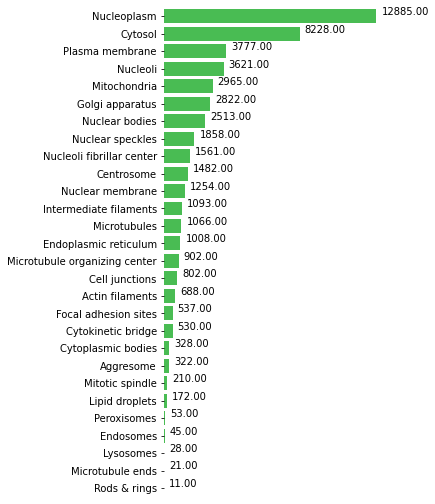

In [7]:
order_doer.plot_ordered_labels_with_names()

### Calculate the f1-scores
The important score in this project is the f1 score. <br>
To make the overfitting visible, we not only plotting the f1 score of the test data, we also plot the score of the training data. <br>
Next we are filing a list with this scores. 

In [8]:
#Create a new dataframe with the f1 scores 
df_metrics_o = df_models.copy()
#Calculate for each model the f1_score
for model_metric in df_metrics_o.columns[4::]:
    #Calculate the training f1_score
    df_metrics_o[model_metric + '_train'] = [fbeta_score(joblib.load(model)[3],joblib.load(model)[4] ,beta=1).round(2) for model in df_metrics_o[model_metric]]
     #Calculate the test f1_score
    df_metrics_o[model_metric] = [fbeta_score(joblib.load(model)[1],joblib.load(model)[2] ,beta=1).round(2) for model in df_metrics_o[model_metric]]
    

# Plotting F1 Scores

### Preparing the objects for plotting
In the class `MulticlassPlots` all needed plots are created for the f1 score. For each model a object of this class is needed and the scores has to be in a specific form.

In [9]:
#Create a list with the objects for the plotter class for each model
f1_plotter_list = [] 
for i in range(model_num):
    df_f1 = pd.DataFrame(df_metrics_o.iloc[:,0:4])
    #save f1 score test
    df_f1['f1'] = df_metrics_o.iloc[:,i+4] 
    #save f1 score training
    df_f1['f1_score_train'] = df_metrics_o.iloc[:,i+model_num+4] 
    #Create objects
    f1_plotter = MulticlassPlots(df_f1)
    f1_plotter_list.append(f1_plotter)

### Plot only f1 scores for test 

1. plot are the f1_score for saved_model_ExT_elnf_r8_cv.
2. plot are the f1_score for saved_model_ExT_elnf_r28_cv.


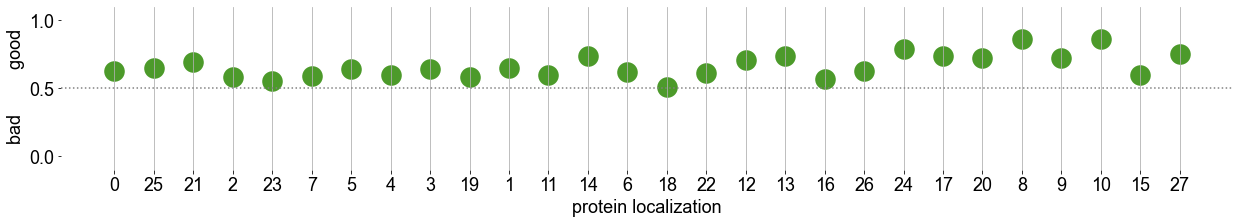

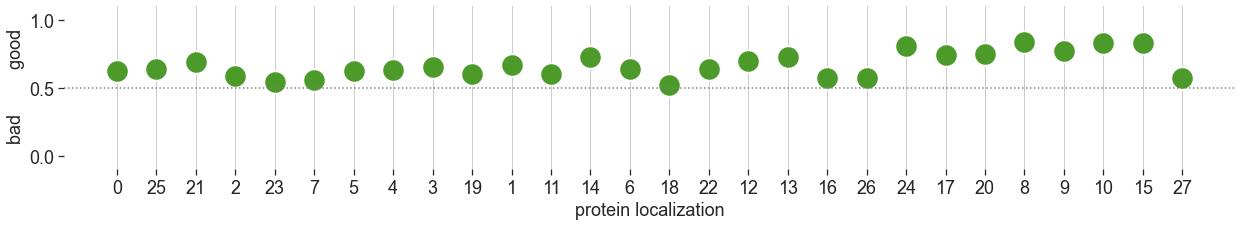

In [10]:
for idx, f1_plotter in enumerate(f1_plotter_list):
    print(f"{idx+1}. plot are the f1_score for {model_name[idx]}.")
    f1_plotter.plot_f1_score()

### Plot f1_scores for test f1 score with mean

1. plot are the f1_score for saved_model_ExT_elnf_r8_cv.
2. plot are the f1_score for saved_model_ExT_elnf_r28_cv.


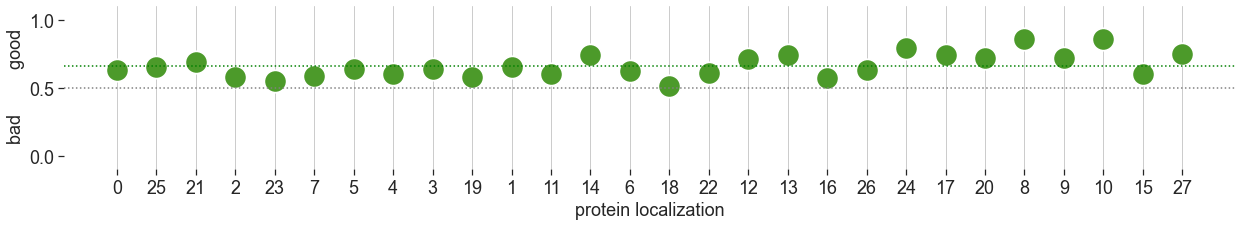

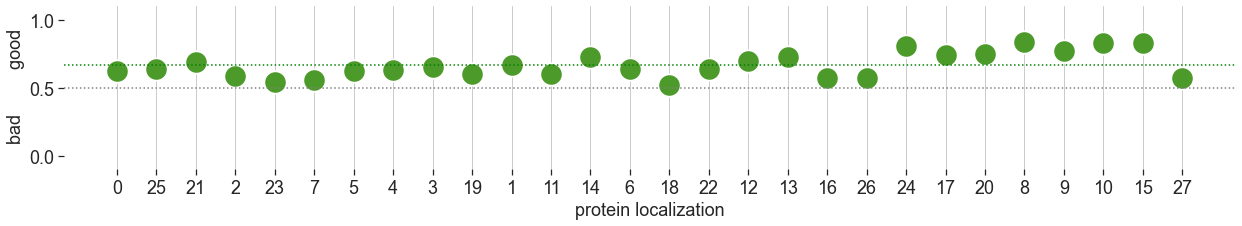

In [11]:
for idx, f1_plotter in enumerate(f1_plotter_list):
    print(f"{idx+1}. plot are the f1_score for {model_name[idx]}.")
    f1_plotter.plot_f1_score(sum(f1_plotter.df_metrics_o.f1)/28)

In [12]:
print(f"Our model has a good macro f1 score of: {sum(f1_plotter.df_metrics_o.f1)/28} ")

Our model has a good macro f1 score of: 0.6660714285714285 


### Plotting model f1 Scores for test and train
In the following plots you see the f1 scores for the test and in a lighter green the f1 score of the training data. 

1. plot are the f1_score for saved_model_ExT_elnf_r8_cv.
2. plot are the f1_score for saved_model_ExT_elnf_r28_cv.


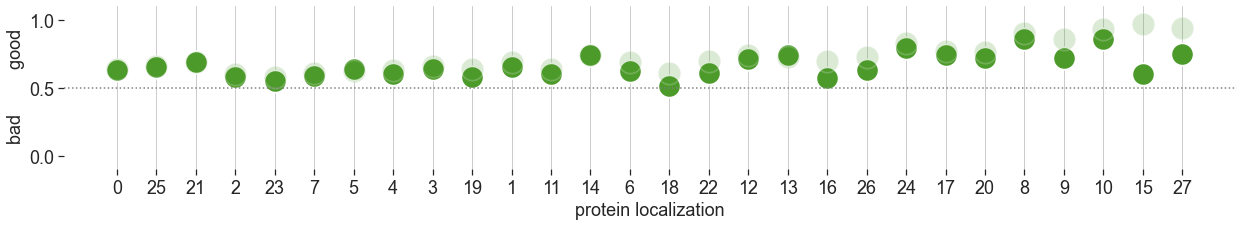

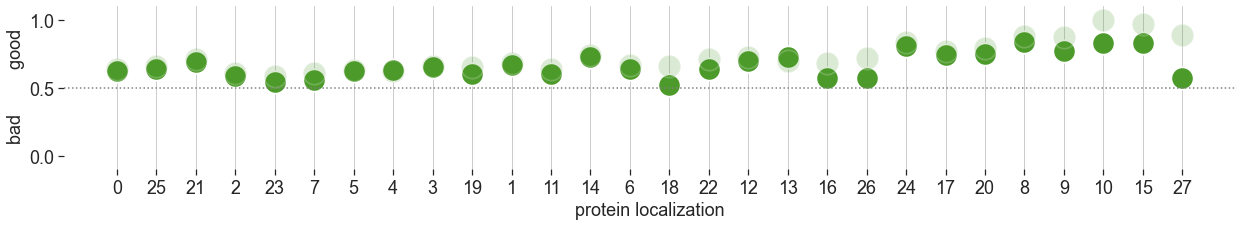

In [13]:
for idx, f1_plotter in enumerate(f1_plotter_list):
    print(f"{idx+1}. plot are the f1_score for {model_name[idx]}.")
    f1_plotter.plot_f1_score_with_train()

There is not much overfitting in the model. Especially for the frequent locations the f1 scores for training and testing are nearly the same. 

### Get the baseline metrics 
For plotting the f1 scores behind the f1 scores of our other models we need to get and change the form of the data we have about our baseline model. <br> 
The baseline metrics are saved in a file in the data directory. 

In [14]:
baseline_metrics = pd.read_csv('../data/train_baseline/baseline_metrics.csv')

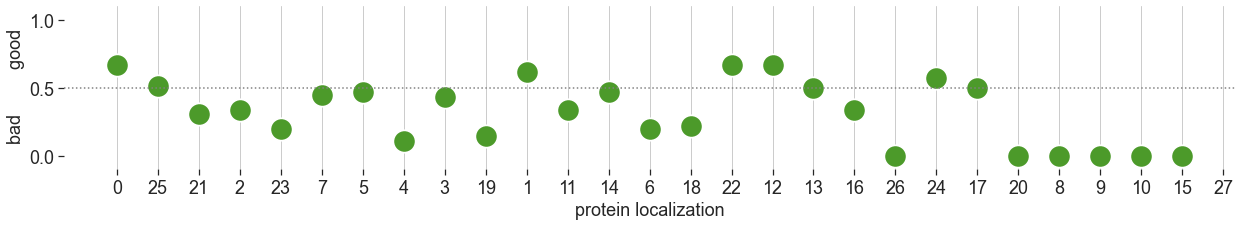

In [15]:
plot_baseline = MulticlassPlots(baseline_metrics)
plot_baseline.plot_f1_score(sum(plot_baseline.df_metrics_o.f1)/28)

### Plot the f1 score of the models and the f1_score of the baseline model


1. plot are the f1_score for saved_model_ExT_elnf_r8_cv.
2. plot are the f1_score for saved_model_ExT_elnf_r28_cv.


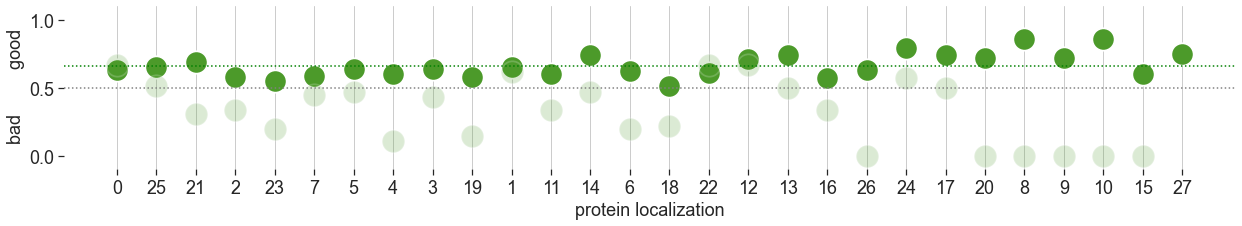

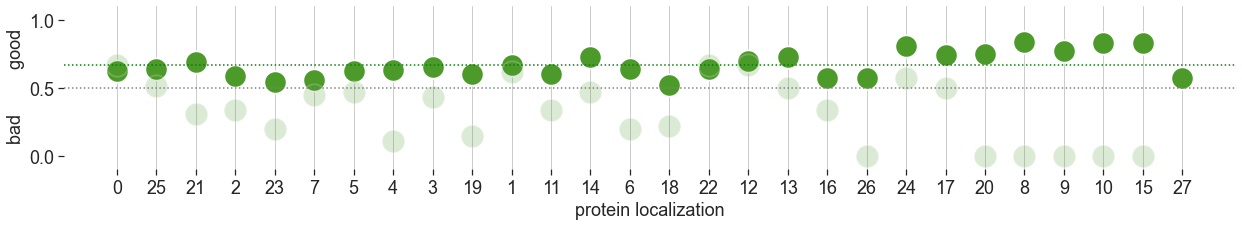

In [16]:
for idx, f1_plotter in enumerate(f1_plotter_list):
    print(f"{idx+1}. plot are the f1_score for {model_name[idx]}.")
    f1_plotter.plot_f1_score_with_other_model(baseline_metrics, sum(f1_plotter.df_metrics_o.f1)/28, sum(plot_baseline.df_metrics_o.f1)/28)

Both model have in most of the location a higher f1 score than the baseline model and the macro f1 is also much higher. 